# Boston Crime Analysis

## By: Trey Williams

**Background:**

Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. Records in the new system begin in June of 2015.

Find more information: https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system 
<br>The website also includes a data dictionary!<br>

-------
**Additional Information**

The Analyze Boston Data Exports posted now are the updated incident data from the Mark43 RMS Database which launched in September of 2019 and is complete through present with the exclusion of data that falls under MGL ch.41 s.98f. The 2019 data that was originally posted contained combined exports from the Intergraph RMS and the Mark43 RMS during 2019 but the Extract/Transfer/Load process was not updated during the transition. We are continuing work on producing the gap data from January 2019 to September 2019 from our legacy Intregraph RMS and will be publishing this as soon as the work is complete.


## Project Charter

## Project Description
As a lifelong Boston resident, I wanted to learn more about crimes committed within Boston. Thankfully, the Boston Police Department (BPD) provides incident reporting data for public use. I have collected several datasets from https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system starting from 2017-2021.  Moreover, the datasets are comprised of records from the new crime incident reporting system, which includes a reduced set of fields focused on capturing the type of incident and when and where it occurred. 


## Business Requirements/Understanding

1. What are the top offenses committed in the city?
2. Are certain crimes committed during a specific time period?
3. Does geography play a role in particular crimes being committed?
4. Has crime decreased or increased over time?
    * What types of offenses remain relevant (status-quo)
    * Newer crimes being committed 
    * Has a specific occurrence of a particular offense decreased over time?
5. Can we determine high-risk areas based on a set of features?

I plan to utilize the [CRISP-DM](https://www.datascience-pm.com/crisp-dm-2/) process model for this project:
1.    Business understanding – What does the business need?
2.    Data understanding – What data do we have/need? Is it clean?
3.    Data preparation – How do we organize the data for modeling?
4.    Modeling – What modeling techniques should we apply?
5.    Evaluation – Which model best meets the business objectives?
6.    Deployment – How do stakeholders access the results?

![crisp-dm](https://www.kdnuggets.com/wp-content/uploads/crisp-dm-4-problems-fig1.png)

### Partner
* Northeastern University

### Methods Used
* Inferential Statistics
* Machine Learning
* Data Visualization
* Predictive Modeling

### Technologies
* Python
* HTML
* Pandas, jupyter
* Scikit Learn
* Matplotlib, Seaborn

## Project Description
As a lifelong Boston resident, I wanted to learn more about crimes committed within Boston. Thankfully, the Boston Police Department (BPD) provides incident reporting data for public use. 
I have collected several datasets from https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system starting from 2017-2021.  Moreover, the datasets are comprised of records from the new crime incident reporting system, which includes a reduced set of fields focused on capturing the type of incident and when and where it occurred. 


#### Total sample size (n=316181)

Size Breakdown
* 2017 (n=101338)  
* 2018 (n=98888)
* 2020 (n=70894)
* both 2019 (n=19782 | Sep-Dec) and 2021 (n=25279 | Jan - May) are partial years. 
 
**Total size: 54.5 MB**

## Needs of this project

- data exploration/descriptive statistics
- data processing/cleaning
- statistical modeling
- writeup/reporting


# Import Libraries

In [50]:
import os 
import glob
import datetime as date 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.compose import ColumnTransformer  
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

sns.set()

## Gather Data

In [51]:
cwd = os.getcwd()

In [52]:
files = glob.glob('Data/*.csv')

In [53]:
%%time 
data = list()

for _ in files:
    data.append(pd.read_csv(_, low_memory=False))
    
df = pd.concat(data).reset_index(drop=True)

Wall time: 1.73 s


In [54]:
# df = pd.read_excel('crime_analysis_data.xlsx')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192074488,619,Larceny,LARCENY ALL OTHERS,C11,351,NaN,2017-08-23 00:00:00,2017,8,Wednesday,0,Part One,ADAMS ST,42.300605,-71.059230,"(42.30060526, -71.05923027)"
1,I192073511,1107,Fraud,FRAUD - IMPERSONATION,B3,435,NaN,2017-02-21 00:01:00,2017,2,Tuesday,0,Part Two,ARMANDINE ST,42.284315,-71.074108,"(42.28431486, -71.07410838)"
2,I192073187,2629,Harassment,HARASSMENT,C6,231,NaN,2017-07-13 00:00:00,2017,7,Thursday,0,Part Two,E FIFTH ST,42.333989,-71.032606,"(42.33398889, -71.03260574)"
3,I192072907,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D4,171,NaN,2017-09-01 16:32:00,2017,9,Friday,16,Part Two,HARRISON AVE,42.335119,-71.074917,"(42.33511904, -71.07491710)"
4,I192072900,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,151,NaN,2017-09-01 00:00:00,2017,9,Friday,0,Part Two,WARREN AVE,42.345163,-71.071291,"(42.34516350, -71.07129114)"


## Explanatory Data Analysis

In [55]:
# Get the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316181 entries, 0 to 316180
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      316181 non-null  object 
 1   OFFENSE_CODE         316181 non-null  int64  
 2   OFFENSE_CODE_GROUP   200226 non-null  object 
 3   OFFENSE_DESCRIPTION  316181 non-null  object 
 4   DISTRICT             314534 non-null  object 
 5   REPORTING_AREA       316181 non-null  object 
 6   SHOOTING             116814 non-null  object 
 7   OCCURRED_ON_DATE     316181 non-null  object 
 8   YEAR                 316181 non-null  int64  
 9   MONTH                316181 non-null  int64  
 10  DAY_OF_WEEK          316181 non-null  object 
 11  HOUR                 316181 non-null  int64  
 12  UCR_PART             200167 non-null  object 
 13  STREET               311859 non-null  object 
 14  Lat                  302723 non-null  float64
 15  Long             

In [56]:
# descriptive statistics
df.describe(include = 'all')

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
count,316181,316181.000000,200226,316181,314534,316181,116814.0,316181,316181.000000,316181.000000,316181,316181.000000,200167,311859,302723.000000,3.027230e+05,316181
unique,292175,NaN,66,244,13,880,3.0,239067,NaN,NaN,7,NaN,4,11860,NaN,NaN,30819
top,I172053750,NaN,Motor Vehicle Accident Response,INVESTIGATE PERSON,B2,,0.0,2017-06-01 00:00:00,NaN,NaN,Friday,NaN,Part Three,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
freq,18,NaN,23701,20817,48436,27743,114288.0,33,NaN,NaN,48169,NaN,103882,14502,NaN,NaN,13458
mean,NaN,2348.906965,NaN,NaN,NaN,NaN,NaN,NaN,2018.430352,6.546235,NaN,13.000705,NaN,NaN,41.836779,-7.027323e+01,NaN
std,NaN,1197.065747,NaN,NaN,NaN,NaN,NaN,NaN,1.346964,3.499536,NaN,6.322761,NaN,NaN,4.514655,7.536971e+00,NaN
min,NaN,111.000000,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,1.000000,NaN,0.000000,NaN,NaN,-1.000000,-7.117867e+01,NaN
25%,NaN,1102.000000,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,3.000000,NaN,9.000000,NaN,NaN,42.296337,-7.109761e+01,NaN
50%,NaN,3005.000000,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,7.000000,NaN,14.000000,NaN,NaN,42.325538,-7.107733e+01,NaN
75%,NaN,3201.000000,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,10.000000,NaN,18.000000,NaN,NaN,42.348303,-7.106150e+01,NaN


In [57]:
df.shape

(316181, 17)

In [58]:
data = df.copy()
data = data.reset_index()

In [59]:
data['DISTRICT'].unique()

array(['C11', 'B3', 'C6', 'D4', nan, 'A7', 'B2', 'D14', 'A1', 'E18', 'E5',
       'E13', 'A15', 'External'], dtype=object)

In Part I, the UCR indexes reported incidents of index crimes which are broken into two categories: violent and property crimes. Aggravated assault, forcible rape, murder, and robbery are classified as violent while arson, burglary, larceny-theft, and motor vehicle theft are classified as property crimes. These are reported via the document named Return A – Monthly Return of Offenses Known to the Police. Part 1 crimes are collectively known as Index crimes, this name is used because the crimes are considered quite serious, tend to be reported more reliably than others, and the reports are taken directly by the police and not a separate agency which aggregates the data and does not necessarily contribute to the UCR.

In Part II, the following categories are tracked: simple assault, curfew offenses and loitering, embezzlement, forgery and counterfeiting, disorderly conduct, driving under the influence, drug offenses, fraud, gambling, liquor offenses, offenses against the family, prostitution, public drunkenness, runaways, sex offenses, stolen property, vandalism, vagrancy, and weapons offenses. 

Part III are considered minor crimes

References:
* https://en.wikipedia.org/wiki/Uniform_Crime_Reports
* https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions
* https://www.bjs.gov/content/pub/pdf/04ucrhandbook.pdf

In [60]:
pd.crosstab(data['DISTRICT'], data['OFFENSE_DESCRIPTION'])

OFFENSE_DESCRIPTION,A&B ON POLICE OFFICER,ABDUCTION - INTICING,AFFRAY,AIRCRAFT INCIDENTS,ANIMAL ABUSE,ANIMAL CONTROL - DOG BITES - ETC.,ANIMAL INCIDENTS,"ANIMAL INCIDENTS (DOG BITES, LOST DOG, ETC)",ANNOYING AND ACCOSTING,ARSON,...,VIOLATION - RESTRAINING ORDER (NO ARREST),WARRANT ARREST,WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPLEMENTAL),WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",WEAPON - FIREARM - OTHER VIOLATION,WEAPON - FIREARM - SALE / TRAFFICKING,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",WEAPON - OTHER - OTHER VIOLATION,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TRAFFICKING/ OTHER
DISTRICT,,,,,,,,,,,,,,,,,,,,,
A1,0,0,41,3,8,8,14,8,12,9,...,16,1035,58,78,21,6,0,64,4,47
A15,0,0,2,1,4,8,7,11,2,3,...,8,73,3,10,4,1,0,10,0,5
A7,0,0,12,60,2,19,15,11,1,3,...,25,194,8,12,12,3,0,35,2,10
B2,2,0,15,5,7,19,20,24,7,24,...,68,954,25,98,186,35,0,59,23,141
B3,0,1,17,0,6,20,21,21,0,11,...,73,424,9,48,117,18,5,33,12,78
C11,0,0,13,0,4,30,22,27,0,8,...,68,726,10,65,91,20,0,39,13,63
C6,0,1,12,0,3,18,11,12,4,5,...,20,481,11,59,29,10,2,13,5,32
D14,0,0,7,0,7,23,12,20,4,11,...,11,166,3,19,13,5,0,19,2,11
D4,0,0,36,3,11,12,13,17,8,13,...,22,826,60,105,25,10,1,41,2,34


----

Which districts seem to have a higher crime rate than others? The question can help establish a baseline for our study.

In [61]:
def frequnecy_table(i):
    freq_tab_district = pd.DataFrame()
    freq_tab_district = pd.crosstab(index=i, columns='count').sort_values(by='count',ascending=False)
    freq_tab_district['Relative Frequency'] = (freq_tab_district/freq_tab_district.sum())*100
    freq_tab_district['Cumulative Frequency'] = freq_tab_district['Relative Frequency'].cumsum()
    return freq_tab_district

In [62]:
freq_tab_district = frequnecy_table(data['DISTRICT'])

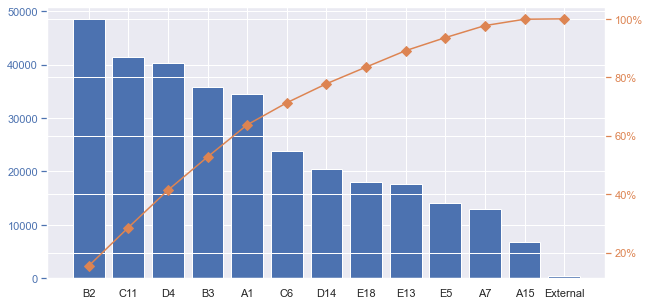

In [63]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(freq_tab_district.index, freq_tab_district["count"], color="C0")
ax2 = ax.twinx()
ax2.plot(freq_tab_district.index, freq_tab_district["Cumulative Frequency"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

Based on the results from the frequency distribution, we can see that 80% of the incidents reported occurred in roughly 8 of the 12 districts, not including external reports.
Of the districts listed, four districts B2, C11, D4, B3, and A1 account for 60-70% of total incidents reported over five years. Let us dive into these districts and see what kinds of crimes are being reported.         

----

In [64]:
data['DISTRICT'].unique()

array(['C11', 'B3', 'C6', 'D4', nan, 'A7', 'B2', 'D14', 'A1', 'E18', 'E5',
       'E13', 'A15', 'External'], dtype=object)

In [65]:
high_crime_locations = data.loc[(data['DISTRICT'] == 'B2') | (data['DISTRICT'] == 'C11') | (data['DISTRICT'] == 'D4') | (data['DISTRICT'] == 'B3') | (data['DISTRICT'] == 'A1')] 

In [66]:
high_crime_locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200416 entries, 0 to 316180
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                200416 non-null  int64  
 1   INCIDENT_NUMBER      200416 non-null  object 
 2   OFFENSE_CODE         200416 non-null  int64  
 3   OFFENSE_CODE_GROUP   129032 non-null  object 
 4   OFFENSE_DESCRIPTION  200416 non-null  object 
 5   DISTRICT             200416 non-null  object 
 6   REPORTING_AREA       200416 non-null  object 
 7   SHOOTING             72071 non-null   object 
 8   OCCURRED_ON_DATE     200416 non-null  object 
 9   YEAR                 200416 non-null  int64  
 10  MONTH                200416 non-null  int64  
 11  DAY_OF_WEEK          200416 non-null  object 
 12  HOUR                 200416 non-null  int64  
 13  UCR_PART             128997 non-null  object 
 14  STREET               198136 non-null  object 
 15  Lat              

In [67]:
high_crime_locations.shape

(200416, 18)

In [68]:
high_crime_locations.describe(include='all')

,index,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
count,200416.000000,200416,200416.000000,129032,200416,200416,200416,72071.0,200416,200416.000000,200416.000000,200416,200416.000000,128997,198136,190875.000000,1.908750e+05,200416
unique,NaN,183383,NaN,65,238,5,584,3.0,160163,NaN,NaN,7,NaN,4,6618,NaN,NaN,16132
top,NaN,I172053750,NaN,Motor Vehicle Accident Response,INVESTIGATE PERSON,B2,,0.0,2017-06-01 00:00:00,NaN,NaN,Friday,NaN,Part Three,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
freq,NaN,18,NaN,14106,12485,48436,17864,70053.0,27,NaN,NaN,30258,NaN,64758,9559,NaN,NaN,9541
mean,156373.051673,NaN,2314.523057,NaN,NaN,NaN,NaN,NaN,NaN,2018.401280,6.547741,NaN,12.990994,NaN,NaN,41.915375,-7.039407e+01,NaN
std,90917.416288,NaN,1191.498773,NaN,NaN,NaN,NaN,NaN,NaN,1.338099,3.490130,NaN,6.397851,NaN,NaN,4.125053,6.925017e+00,NaN
min,0.000000,NaN,111.000000,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,1.000000,NaN,0.000000,NaN,NaN,-1.000000,-7.117374e+01,NaN
25%,77876.750000,NaN,802.000000,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,3.000000,NaN,9.000000,NaN,NaN,42.297555,-7.108531e+01,NaN
50%,155152.500000,NaN,3005.000000,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,7.000000,NaN,14.000000,NaN,NaN,42.321035,-7.107461e+01,NaN
75%,235054.750000,NaN,3201.000000,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,10.000000,NaN,18.000000,NaN,NaN,42.344523,-7.106320e+01,NaN


In [69]:
# Double check the frequency to check the new results 
frequnecy_table(high_crime_locations['DISTRICT'])

col_0,count,Relative Frequency,Cumulative Frequency
DISTRICT,,,
B2,48436,24.167731,24.167731
C11,41327,20.620609,44.788340
D4,40274,20.095202,64.883542
B3,35829,17.877315,82.760857
A1,34550,17.239143,100.000000


Of the offenses being reported in these high crime areas , how many are classified as UCR Part 1 (violent offenses) versus the other UCR parts. 

 ----
 
 ### More Information on UCR
 
 In Part I, the UCR indexes reported incidents of index crimes which are broken into two categories: violent and property crimes. Aggravated assault, forcible rape, murder, and robbery are classified as violent while arson, burglary, larceny-theft, and motor vehicle theft are classified as property crimes. These are reported via the document named Return A – Monthly Return of Offenses Known to the Police. Part 1 crimes are collectively known as Index crimes, this name is used because the crimes are considered quite serious, tend to be reported more reliably than others, and the reports are taken directly by the police and not a separate agency which aggregates the data and does not necessarily contribute to the UCR.

In Part II, the following categories are tracked: simple assault, curfew offenses and loitering, embezzlement, forgery and counterfeiting, disorderly conduct, driving under the influence, drug offenses, fraud, gambling, liquor offenses, offenses against the family, prostitution, public drunkenness, runaways, sex offenses, stolen property, vandalism, vagrancy, and weapons offenses. 

Part III are considered minor crimes

References:
* https://en.wikipedia.org/wiki/Uniform_Crime_Reports
* https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions
* https://www.bjs.gov/content/pub/pdf/04ucrhandbook.pdf

In [70]:
pd.crosstab(high_crime_locations['UCR_PART'], high_crime_locations['DISTRICT'])

DISTRICT,A1,B2,B3,C11,D4
UCR_PART,,,,,
Other,47,162,101,138,96
Part One,5221,5158,2984,4131,7095
Part Three,10340,15931,12870,14569,11048
Part Two,6724,10374,7193,7838,6977


In [71]:
# Store table results into new object for futher exploration
offense_tab = pd.crosstab(high_crime_locations['OFFENSE_DESCRIPTION'], high_crime_locations['DISTRICT'])
offense_tab

DISTRICT,A1,B2,B3,C11,D4
OFFENSE_DESCRIPTION,,,,,
A&B ON POLICE OFFICER,0,2,0,0,0
ABDUCTION - INTICING,0,0,1,0,0
AFFRAY,41,15,17,13,36
AIRCRAFT INCIDENTS,3,5,0,0,3
ANIMAL ABUSE,8,7,6,4,11
...,...,...,...,...,...
WEAPON - FIREARM - OTHER VIOLATION,6,35,18,20,10
WEAPON - FIREARM - SALE / TRAFFICKING,0,0,5,0,1
"WEAPON - OTHER - CARRYING / POSSESSING, ETC",64,59,33,39,41


In [72]:
# create a top 15 formula 
def sort_vals_bar_chart(i): # create function name 
    sort = pd.DataFrame() # create empty Dataframe 
    sorts = i.sort_values(ascending=False).head(15) #store value into object
    # Create labels for each bar 
    y_labels = sorted(sorts.index)
    error = np.std(sorts, axis = 0)
    
    #activate style
    plt.style.use('seaborn-white')
    
    # #plot the figure
    fig, ax = plt.subplots(figsize=(5,5))
   
    p1 = ax.barh(y_labels, sorts, xerr=error, align='center', alpha=0.8, ecolor='black', capsize=4)
    ax.set_title('Top 15 offenses reported in District {}'.format(i.name), fontsize=14, fontweight='bold')
    ax.set_xlabel('Number of Incidents Recorded', )
    ax.set_ylabel('Offenses Reported')
    ax.get_yticklabels()
    ax.bar_label(p1, padding=8)
    
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 10)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=1, right=3.2, hspace=0.25,
                    wspace=0.35)



#### Univariate Analysis

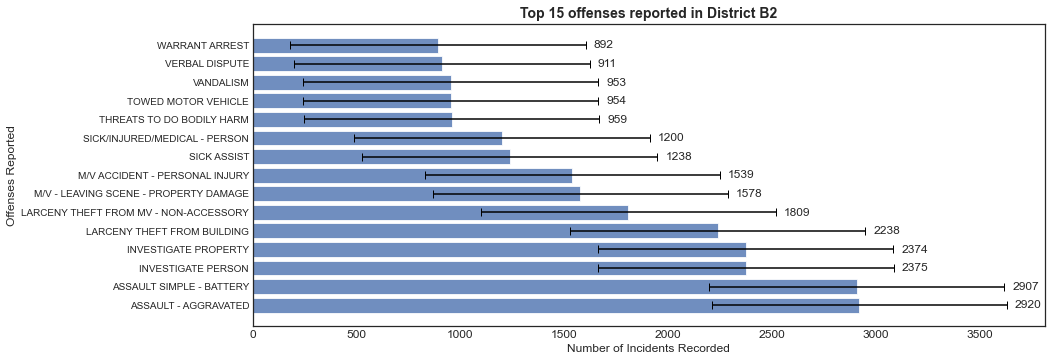

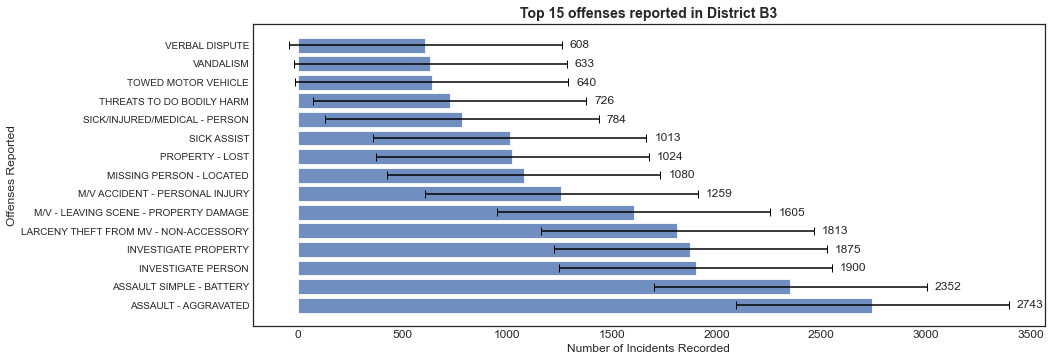

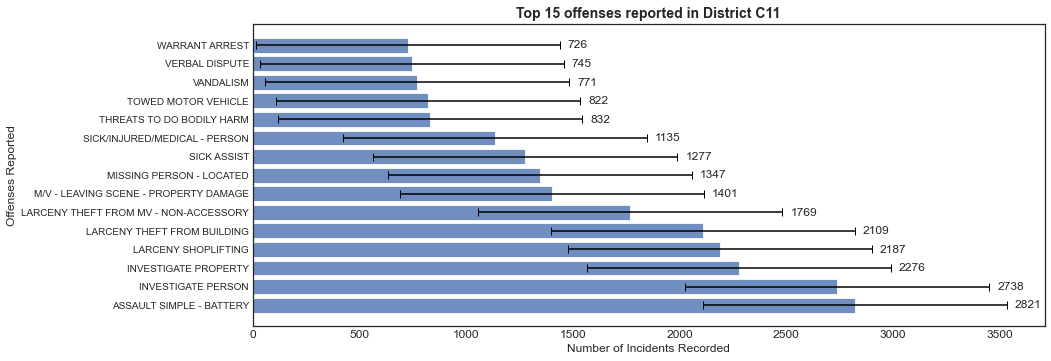

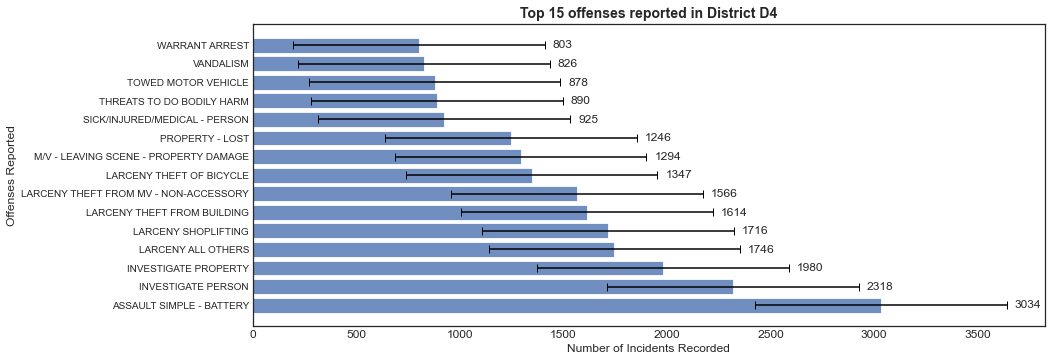

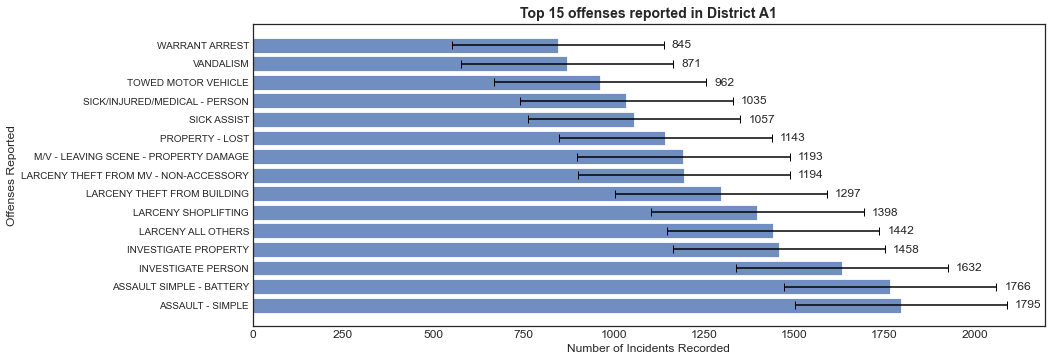

In [73]:
sort_vals_bar_chart(offense_tab['B2'])
sort_vals_bar_chart(offense_tab['B3'])
sort_vals_bar_chart(offense_tab['C11'])
sort_vals_bar_chart(offense_tab['D4'])
sort_vals_bar_chart(offense_tab['A1'])

Results vary from district to district; however, there are some re-occurring themes throughout all four districts. What is it about these areas that may attract these crimes, and have these same crimes persisted since 2017.

In [74]:
district_yr_offense_tab = pd.crosstab(columns=high_crime_locations['OFFENSE_DESCRIPTION'], index=[high_crime_locations['DISTRICT'], high_crime_locations['YEAR']])

In [80]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
temp = district_yr_offense_tab.loc['B2']
temp[['INVESTIGATE PERSON', 'M/V - LEAVING SCENE - PROPERTY DAMAGE',
       'SICK/INJURED/MEDICAL - PERSON', 'VERBAL DISPUTE', 'VANDALISM',
       'INVESTIGATE PROPERTY', 'ASSAULT SIMPLE - BATTERY',
       'THREATS TO DO BODILY HARM', 'LARCENY THEFT FROM MV - NON-ACCESSORY',
       'TOWED MOTOR VEHICLE', 'M/V ACCIDENT - PERSONAL INJURY',
       'WARRANT ARREST', 'ASSAULT - AGGRAVATED', 'SICK ASSIST',
       'LARCENY THEFT FROM BUILDING']].loc[2017]

OFFENSE_DESCRIPTION
INVESTIGATE PERSON                       1036
M/V - LEAVING SCENE - PROPERTY DAMAGE     906
SICK/INJURED/MEDICAL - PERSON             935
VERBAL DISPUTE                           1033
VANDALISM                                 755
INVESTIGATE PROPERTY                      558
ASSAULT SIMPLE - BATTERY                  768
THREATS TO DO BODILY HARM                 522
LARCENY THEFT FROM MV - NON-ACCESSORY     347
TOWED MOTOR VEHICLE                       343
M/V ACCIDENT - PERSONAL INJURY            318
WARRANT ARREST                            507
ASSAULT - AGGRAVATED                      188
SICK ASSIST                                 0
LARCENY THEFT FROM BUILDING               334
Name: 2017, dtype: int64

Although crime has decreased slightly since 2017 - most crimes have remained relatively high. Additionally, as time elapses, norms and standards will evolve to adapt to a changing environment. Why has the B2 District remained the same over several years? Is there are large enough police force/presence to handle these crimes? How has local enforcement adjusted to counteract criminal activities and enterprises within these communities? These and a ton of other questions!  

In [ ]:
temp = district_yr_offense_tab.loc['B3']
temp[['INVESTIGATE PERSON', 'VERBAL DISPUTE',
       'M/V - LEAVING SCENE - PROPERTY DAMAGE', 'INVESTIGATE PROPERTY',
       'VANDALISM', 'SICK/INJURED/MEDICAL - PERSON',
       'THREATS TO DO BODILY HARM', 'ASSAULT SIMPLE - BATTERY',
       'MISSING PERSON - LOCATED', 'TOWED MOTOR VEHICLE', 'SICK ASSIST',
       'LARCENY THEFT FROM MV - NON-ACCESSORY', 'ASSAULT - AGGRAVATED',
       'PROPERTY - LOST', 'M/V ACCIDENT - PERSONAL INJURY']]

In [ ]:
temp = district_yr_offense_tab.loc['C11']
temp[['M/V - LEAVING SCENE - PROPERTY DAMAGE', 'INVESTIGATE PERSON',
       'SICK/INJURED/MEDICAL - PERSON', 'VANDALISM', 'VERBAL DISPUTE',
       'INVESTIGATE PROPERTY', 'TOWED MOTOR VEHICLE',
       'THREATS TO DO BODILY HARM', 'ASSAULT SIMPLE - BATTERY',
       'LARCENY THEFT FROM MV - NON-ACCESSORY', 'LARCENY SHOPLIFTING',
       'SICK ASSIST', 'MISSING PERSON - LOCATED',
       'LARCENY THEFT FROM BUILDING', 'WARRANT ARREST']]

In [ ]:
temp = district_yr_offense_tab.loc['D4']
temp[['LARCENY SHOPLIFTING', 'INVESTIGATE PERSON',
       'LARCENY THEFT FROM BUILDING', 'TOWED MOTOR VEHICLE',
       'SICK/INJURED/MEDICAL - PERSON',
       'LARCENY THEFT FROM MV - NON-ACCESSORY', 'VANDALISM',
       'INVESTIGATE PROPERTY', 'M/V - LEAVING SCENE - PROPERTY DAMAGE',
       'ASSAULT SIMPLE - BATTERY', 'LARCENY THEFT OF BICYCLE',
       'LARCENY ALL OTHERS', 'PROPERTY - LOST', 'WARRANT ARREST',
       'THREATS TO DO BODILY HARM']]

Overall, these areas continue to present a problem for local law enforcement. I am interested to learn how local and city governments will help deter crime, which has been rather persistent in these areas for several years. Maybe the answer is Gentrification!? Nonetheless, it would be interesting to see the distribution of these crimes over five years

In [ ]:
district_yrmnth_offense_tab = pd.crosstab(columns=high_crime_locations['OFFENSE_DESCRIPTION'], index=[high_crime_locations['DISTRICT'], high_crime_locations['YEAR'], high_crime_locations['MONTH']])

In [ ]:
temp = district_yrmnth_offense_tab.loc[('B2',2017)]
temp[['INVESTIGATE PERSON', 'M/V - LEAVING SCENE - PROPERTY DAMAGE',
       'SICK/INJURED/MEDICAL - PERSON', 'VERBAL DISPUTE', 'VANDALISM',
       'INVESTIGATE PROPERTY', 'ASSAULT SIMPLE - BATTERY',
       'THREATS TO DO BODILY HARM', 'LARCENY THEFT FROM MV - NON-ACCESSORY',
       'TOWED MOTOR VEHICLE', 'M/V ACCIDENT - PERSONAL INJURY',
       'WARRANT ARREST', 'ASSAULT - AGGRAVATED', 'SICK ASSIST',
       'LARCENY THEFT FROM BUILDING']].plot.box(vert=False, title = "Top 15 Incidents Reported Distribution (2017-2021): District B2 ", patch_artist=True);

In [ ]:
temp = district_yrmnth_offense_tab.loc['B3']
temp[['INVESTIGATE PERSON', 'VERBAL DISPUTE',
       'M/V - LEAVING SCENE - PROPERTY DAMAGE', 'INVESTIGATE PROPERTY',
       'VANDALISM', 'SICK/INJURED/MEDICAL - PERSON',
       'THREATS TO DO BODILY HARM', 'ASSAULT SIMPLE - BATTERY',
       'MISSING PERSON - LOCATED', 'TOWED MOTOR VEHICLE', 'SICK ASSIST',
       'LARCENY THEFT FROM MV - NON-ACCESSORY', 'ASSAULT - AGGRAVATED',
       'PROPERTY - LOST', 'M/V ACCIDENT - PERSONAL INJURY']].plot.box(vert=False, figsize=(10,10), title = "Top 15 Incidents Reported Distribution (2017-2021): District B3 ", patch_artist=True);

In [ ]:
temp = district_yrmnth_offense_tab.loc['C11']
temp[['M/V - LEAVING SCENE - PROPERTY DAMAGE', 'INVESTIGATE PERSON',
       'SICK/INJURED/MEDICAL - PERSON', 'VANDALISM', 'VERBAL DISPUTE',
       'INVESTIGATE PROPERTY', 'TOWED MOTOR VEHICLE',
       'THREATS TO DO BODILY HARM', 'ASSAULT SIMPLE - BATTERY',
       'LARCENY THEFT FROM MV - NON-ACCESSORY', 'LARCENY SHOPLIFTING',
       'SICK ASSIST', 'MISSING PERSON - LOCATED',
       'LARCENY THEFT FROM BUILDING', 'WARRANT ARREST']].plot.box(vert=False, figsize=(10,10), title = "Top 15 Incidents Reported Distribution (2017-2021): District C11 ", patch_artist=True);

In [ ]:
temp = district_yrmnth_offense_tab.loc['D4']
temp[['LARCENY SHOPLIFTING', 'INVESTIGATE PERSON',
       'LARCENY THEFT FROM BUILDING', 'TOWED MOTOR VEHICLE',
       'SICK/INJURED/MEDICAL - PERSON',
       'LARCENY THEFT FROM MV - NON-ACCESSORY', 'VANDALISM',
       'INVESTIGATE PROPERTY', 'M/V - LEAVING SCENE - PROPERTY DAMAGE',
       'ASSAULT SIMPLE - BATTERY', 'LARCENY THEFT OF BICYCLE',
       'LARCENY ALL OTHERS', 'PROPERTY - LOST', 'WARRANT ARREST',
       'THREATS TO DO BODILY HARM']].plot.box(vert=False, figsize=(10,10), title = "Top 15 Incidents Reported Distribution (2017-2021): District D4 ", patch_artist=True, );

The results are rather surprising in my opinion. Over the course of 4-5 years, the same crimes have presisted within these four districts, and remained relativity high YoY and MoM, which is astonishing. To gain a better understanding, learning more about the location, and times these crimes are reported can help local law enforcement develop plans to subvert criminal activities. 

In [ ]:
# lets model time 
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

district_dow_offense_tab = pd.crosstab(columns=high_crime_locations['DISTRICT'], index=[high_crime_locations['YEAR'], high_crime_locations['DAY_OF_WEEK']])
district_dow_offense_tab

In [ ]:
district_dow_offense_tab.loc[2017].plot(kind='bar', figsize=(20,10))

In [ ]:
district_dow_offense_tab.loc[2018].plot(kind='bar', figsize=(20,10))

In [ ]:
district_dow_offense_tab.loc[2019].plot(kind='bar', figsize=(20,10))

In [ ]:
district_dow_offense_tab.loc[2020].plot(kind='bar', figsize=(20,10))

The results indicate soemthing interesting; most crimes occur on Wednesdays? That is very odd to be honest. What is it about Wednesday that criminals love? Nonetheless, Friday, Thursday, and Tuesday rank as the worst days of the week for at least B2 and C11. 

In [ ]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
district_dowyr_offense_tab = pd.crosstab(columns=[high_crime_locations['DISTRICT']], index=[high_crime_locations['YEAR'].astype('str')])
district_dowyr_offense_tab

In [ ]:
district_dowyr_offense_tab.plot(kind='barh', figsize=(20,10))

In [ ]:
district_month_offense_tab = pd.crosstab(columns=high_crime_locations['DISTRICT'], index=[high_crime_locations['MONTH']])
district_month_offense_tab

In [ ]:
district_month_offense_tab.plot(figsize=(10,10), ylabel="Number of Crimes Reported",title="Crimes Reported by Month (2017-2021)", linewidth=2, marker='o')

The month of October seems to be a trend. That begs to question, what is so special about this particular month; I am unaware of any holidays other than Halloween. For future consideration, it would be awesome to see what crimes are committed in October than any other month

## Data Cleaning

In [ ]:
model_data  = high_crime_locations.copy()
model_data = model_data.reset_index()

In [ ]:
model_data.describe(include='all')

In [ ]:
model_data.corr()

In [ ]:
plt.figure(figsize = (12,9))
s = sns.heatmap(model_data.corr(),
               annot = True,
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Corr Heatmap')
plt.show()

In [ ]:
# Drop irrelevant columns 
model_data = model_data.drop(['level_0','index','INCIDENT_NUMBER','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION','OCCURRED_ON_DATE','STREET','Location', 'REPORTING_AREA'], axis = 1)

In [ ]:
#check missing values
model_data.isna().sum()

In [ ]:
# Map features
model_data['DISTRICT'] = model_data['DISTRICT'].map({'C11':1, 'B3':2, 'D4':3, 'B2':4})
model_data['UCR_PART'] = model_data['UCR_PART'].map({'Part One': 1 , 'Part Two': 2, 'Part Three': 3, 'Other': 4})
model_data['DAY_OF_WEEK'] = model_data['DAY_OF_WEEK'].map({'Wednesday': 4, 'Tuesday': 3, 'Friday':6, 'Thursday':5, 'Sunday':1, 'Saturday':7, 'Monday':2})
model_data['SHOOTING'] = model_data['SHOOTING'].map({'Y':1})
model_data['SHOOTING'] = model_data['SHOOTING'].fillna(value=0) 
model_data['UCR_PART'] = model_data['UCR_PART'].fillna(value=0)
model_data['Lat'] = model_data['Lat'].fillna(value=0)
model_data['Long'] = model_data['Long'].fillna(value=0)

In [ ]:
# double check missing values
model_data.isna().sum()

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(model_data['Lat'], model_data['Long'])
plt.xlabel('Lat')
plt.ylabel('Long')
plt.title("Lat and Long")
plt.show()

## Modeling

### Clustering (unscaled data)

In [ ]:
# create a variable which will contain the data for clustering
x = model_data.copy()
# Create k-means object with 2 clusters
kmeans = KMeans(2)
# fit the data 
kmeans.fit(x)

In [ ]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(i, init = 'k-means++', random_state = 777)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [ ]:
clusters = kmeans.fit(x) # fit the data 
identified_clusters = kmeans.fit_predict(x) # store predicted clusters into object
df_clusters = model_data.copy() # create new data frame
df_clusters['Clusters'] = identified_clusters # create new column with predicted clusters
df_clusters

In [ ]:
df_clus = model_data.copy()
df_clus['Segment K-means'] = kmeans.labels_

In [ ]:
df_segment_analysis = df_clus.groupby(['Segment K-means']).mean()
df_segment_analysis

In [ ]:
df_segment_analysis['N Obs'] = df_clus[['Segment K-means', 'DISTRICT']].groupby(['Segment K-means']).count()
df_segment_analysis['Prop Obs'] = df_segment_analysis['N Obs'] / df_segment_analysis['N Obs'].sum()
df_segment_analysis

In [ ]:
df_clus['Labels'] = df_clus['Segment K-means']

In [ ]:
x_axis = df_clus['Lat']
y_axis = df_clus['Long']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_clus['Labels'], cmap='rainbow')
plt.title('Segmentation K-means')
plt.show()

## PCA and Standardization

### Standardize the variables 

In [ ]:
sd_data =  model_data.copy() # make a copy of the data set 
x = sd_data # store the feature variables object
scaled_x = preprocessing.scale(x) #Standardize the data to have a mean of ~0 and a variance of 1
scaled_x 

### Apply Principal Component Analysis

In [ ]:
#Assign model to object
pca = PCA()
#fit the model 
pca.fit(scaled_x)
# The results display the variance explained by each of the individual components
pca.explained_variance_ratio_

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(range(1,11), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = "--")
plt.title('Explained Variance by Components')
plt.xlabel('Number of Compenents')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.title('Explained Variance by Components')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

After scaling and applying PCA to the data, 4-6 components explain a majority of variance within the data. However, if I only take 4 elements, we sacrifice more than 40% of the data. Moving forward, I will use six components for the remainder of the study.

In [ ]:
# store compenents in a Dataframe
pca = PCA(6)
pca.fit(scaled_x)
pca_comps = pca.transform(scaled_x)

In [ ]:
pca.components_

In [ ]:
df_comp_pca = pd.DataFrame(data = pca.components_, columns=model_data.columns.values, index = ['Component 1', 'Component 2','Component 3',
                                                                                               'Component 4','Component 5','Component 6'])

In [ ]:
df_comp_pca

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df_comp_pca,
           vmin = -1,
           vmax = 1,
           cmap = 'RdBu',
           annot = True)

plt.yticks([0,1,2,3,4,5], ['Component 1', 'Component 2','Component 3','Component 4','Component 5','Component 6'], rotation = 45, fontsize = 9)
plt.show()

In [ ]:
pca.transform(scaled_x)

In [ ]:
scores_pca = pca.transform(scaled_x)

## Apply elbow method 

In [ ]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. We have it set at 10 right now, but it is completely arbitrary.
cl_num = 11
for i in range (1,cl_num):
    kmeans_pca= KMeans(i, init='k-means++', random_state=777)
    kmeans_pca.fit(scores_pca)
    wcss_iter = kmeans_pca.inertia_
    wcss.append(wcss_iter)
    
wcss

In [ ]:
number_clusters = range(1,cl_num)
plt.figure(figsize=(10,10))
plt.plot(number_clusters, wcss, '-o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

Based on the results from the elbow analysis, the point of interest is around 3 or 4 clusters. 

In [ ]:
# define the model
kmeans_pca = KMeans(3, init='k-means++', random_state=777)
#fit the model
kmeans_pca.fit(scores_pca)
# store clusters
# final_clusters = sd_data.copy() 
# final_clusters['Clusters'] = kmeans.fit_predict(pca_comps)
# final_clusters

In [ ]:
df_seg_pca_kmeans = pd.concat([model_data.reset_index(drop=True), pd.DataFrame(scores_pca)], axis = 1)
df_seg_pca_kmeans.columns.values[-6:] = ['Component 1', 'Component 2','Component 3','Component 4','Component 5','Component 6']
df_seg_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [ ]:
df_seg_pca_kmeans

In [ ]:
df_seg_pca_kmeans_freq = df_seg_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_seg_pca_kmeans_freq

In [ ]:
df_seg_pca_kmeans_freq['N Obs'] = df_seg_pca_kmeans[['Segment K-means PCA', 'DISTRICT']].groupby(['Segment K-means PCA']).count()
df_seg_pca_kmeans_freq['Prop Obs'] = df_seg_pca_kmeans_freq['N Obs'] / df_seg_pca_kmeans_freq['N Obs'].sum()
df_seg_pca_kmeans_freq

In [ ]:
df_seg_pca_kmeans['Labels'] = df_seg_pca_kmeans['Segment K-means PCA'].map({0:'Segment 1', 1:'Segment 2', 2:'Segment 3'})

In [ ]:
x_axis = df_seg_pca_kmeans['Component 1']
y_axis = df_seg_pca_kmeans['Component 2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['Labels'], cmap='rainbow')
plt.title('Segmentation K-means')
plt.show()

----

Ultimately, my research unearthed some interesting findings that are worth exploring. I am very interested in how crime rates will change in the city with impending gentrification and the massive migration of city dwellers to impoverished suburban areas. All in all, nothing is ever perfect; however, the lack of accountability on the side of law enforcement and local government is astounding. We as citizens deserve to know and understand how the state plans to discourage and deter crime from these areas. Knowledge is power, and using the data effectively can create awareness and opportunities for growth in a failing system; this is one of many steps Boston Natives need to take to reclaim their neighborhoods.  